<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw1q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras import models
from keras import layers
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


Loading images from MNIST dataset

In [2]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Displaying the original values

In [3]:
train_images_original.shape, train_labels_original, test_images_original.shape, test_labels_original.shape

((60000, 28, 28),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 (10000, 28, 28),
 (10000,))

Extracting images

In [0]:
train_images_new = (train_images_original.reshape(60000,28 * 28))
train_images_new = train_images_new.astype('float32')/255


test_images_new = (test_images_original.reshape(10000,28 * 28))
test_images_new = test_images_new.astype('float32')/255

Converting integer vectors to binary

In [0]:
train_labels_new = (keras.utils.to_categorical(train_labels_original,10))
y_c = test_labels_original
test_labels_new = (keras.utils.to_categorical(test_labels_original,10))

Displaying new values

In [23]:
train_images_new.shape, train_labels_new.shape, test_images_new.shape, test_labels_new.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

Adding the extra feature for the number of white regions

In [0]:
regions = 1
for i in range(train_images_new.shape[0]):
  if train_labels_original[i] == (1 or 2 or 3 or 5 or 7):
    regions = 1
  if train_labels_original[i] == (0 or 4 or 6 or 9):
    regions = 2
  if train_labels_original[i] == 8:
    regions = 3
  feature = np.round(regions/6,2)
  np.append(train_images_new[i], feature)

In [28]:
train_images_new.shape

(60000, 784)

Creating network

In [0]:
network = models.Sequential()
network.add(layers.Dense(10, activation='softmax'))

Compilation

In [8]:
network.compile(optimizer=keras.optimizers.SGD(lr = 0.01),loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Training

In [9]:
model = network.fit(train_images_new, 
                      train_labels_new, 
                      epochs= 10, 
                      batch_size= 10, 
                      validation_data=(test_images_new, test_labels_new))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.5403 - acc: 0.8630 - val_loss: 0.3643 - val_acc: 0.9014
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3613 - acc: 0.9003 - val_loss: 0.3260 - val_acc: 0.9107
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3326 - acc: 0.9077 - val_loss: 0.3091 - val_acc: 0.9154
Epoch 4/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3176 - acc: 0.9110 - val_loss: 0.2984 - val_acc: 0.9161
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3080 - acc: 0.9147 - val_loss: 0.2929 - val_acc: 0.9168
Epoch 6/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3010 - acc: 0.9161 - val_loss: 0.2915 - val_acc: 0.9190
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - 

Display Loss

Test loss: 0.2785907453417778
Test accuracy: 0.9228


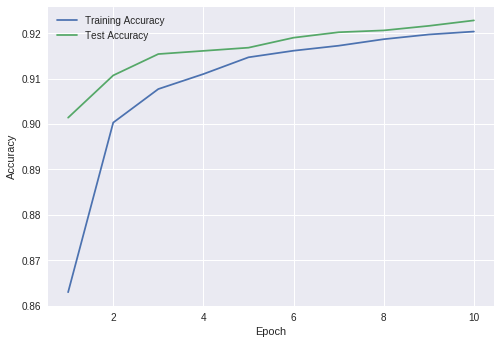

In [10]:
metrics = network.evaluate(test_images_new, test_labels_new, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

accuracyplot = plt.plot(range(1,11),model.history['acc'],range(1,11),model.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)